# Exercise Sheet 04

## Task 1

At first the code from *classifier dataset.ipynb* is copied into the file.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

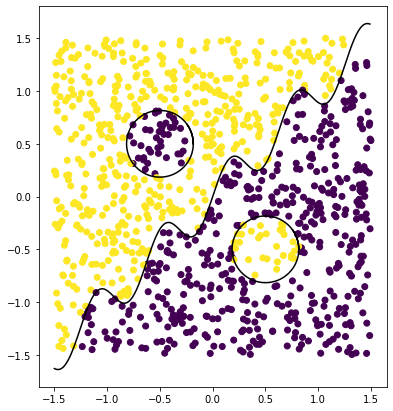

In [66]:
def con1(x,y):
    if y>=0.2*np.sin(10*x)+x:
        rv = 1
    else:
        rv = -1
    return rv

def con2(x,y):
    if (x+0.5)**2+(y-0.5)**2<= 0.1:
        rv = -2
    else:
        rv = 0
    return rv

def con3(x,y):
    if (x-0.5)**2+(y+0.5)**2<= 0.1:
        rv = 2
    else:
        rv = 0
    return rv

length=1000
xyset = 3.*(np.random.rand(length,2)-[0.5,0.5])
classes=[con1(xyset[i,0],xyset[i,1])+con2(xyset[i,0],xyset[i,1])+con3(xyset[i,0],xyset[i,1]) for i in range(len(xyset))]

# function that plots data with the true boundaries to axes

def plotTrueBoundaries(ax):
    phiRange = np.arange(0,7,0.1)
    xRange = np.arange(-1.5,1.5,0.01)
    x1 = -0.5 + np.sqrt(0.1)*np.cos(phiRange)
    y1 =  0.5 + np.sqrt(0.1)*np.sin(phiRange)
    x2 =  0.5 + np.sqrt(0.1)*np.cos(phiRange)
    y2 = -0.5 + np.sqrt(0.1)*np.sin(phiRange)
    y3 =  0.2*np.sin(10*xRange) + xRange
    ax.plot(x1, y1,'black')
    ax.plot(x2, y2,'black')
    ax.plot(xRange, y3,'black')

plt.figure(figsize = (7,7))
plt.scatter(xyset[:, 0], xyset[:, 1], c = classes)
plotTrueBoundaries(plt.gca())
plt.gca().set_aspect('equal')

### •

The dataset is aranged appropriately and then split into a training (67%) and a test set (33%).

In [67]:
from sklearn.model_selection import train_test_split
X=[]
for i in range(len(xyset[:, 0])):
    X.append([xyset[:, 0][i],xyset[:, 1][i]])
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size=0.33, random_state=42)

Next, the four classifiers are built.

#### Support Vector Machines

In [68]:
from sklearn import svm
clfSVM = svm.SVC()
clfSVM.fit(X_train, y_train);

#### DecisionTreeClassifier

In [69]:
from sklearn import tree
clfDTC = tree.DecisionTreeClassifier()
clfDTC.fit(X_train, y_train);

#### RandomForestClassifier

In [70]:
from sklearn import ensemble
clfRFC = ensemble.RandomForestClassifier()
clfRFC.fit(X_train, y_train);

#### AdaBoostClassifier

In [71]:
from sklearn import ensemble
clfABC = ensemble.AdaBoostClassifier()
clfABC.fit(X_train, y_train);

### •

A grid of points (X2,Y2) is created, i.e. X2 = [-1.5, -1.47, ..., 1.5, -1.5, ...], Y2=[-1.5, -1.5, ..., -1.5, -1.47, ...], along with a list with the X-Y-pairs, i.e. XY = [[-1.5,-1.5],[-1.47,-1.5], ...]

In [72]:
X2=np.linspace(-1.5,1.5,100)
Y2=np.linspace(-1.5,1.5,100)
X2,Y2 = np.meshgrid(X2,Y2)
X2 = X2.reshape((1,10000))[0]
Y2 = Y2.reshape((1,10000))[0]
XY=[[X2[i],Y2[i]] for i in range(len(X2))]

For all classifieres at first the scores are calculated. Then an array of the predicted values for the X-Y-pairs (XY) is created. The result is visualized in a plot. In this plot you can also see the true boundaries.

#### Support Vector Machines

Score SVM:  0.8939393939393939


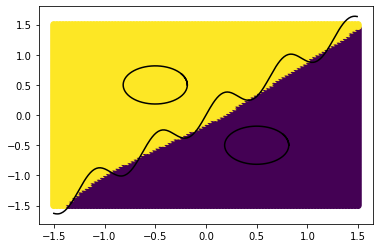

In [73]:
score = clfSVM.score(np.array(X_test), y_test)
print('Score SVM: ',score)

cla=clfSVM.predict(XY)
plt.scatter(X2, Y2, c = cla)
plotTrueBoundaries(plt.gca())

#### DecisionTreeClassifier

Score DTC:  0.9333333333333333


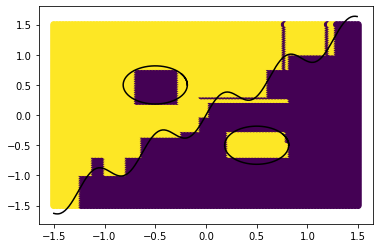

In [79]:
scoreDTC = clfDTC.score(np.array(X_test), y_test)
print('Score DTC: ',scoreDTC)

cla=clfDTC.predict(XY)
plt.scatter(X2, Y2, c = cla)
plotTrueBoundaries(plt.gca())

#### RandomForestClassifier

Score RFC:  0.9545454545454546


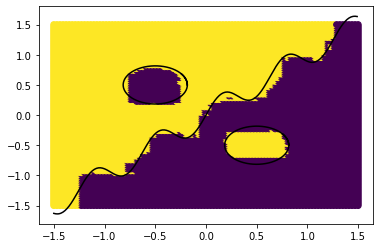

In [75]:
score = clfRFC.score(np.array(X_test), y_test)
print('Score RFC: ',score)

cla=clfRFC.predict(XY)
plt.scatter(X2, Y2, c = cla)
plotTrueBoundaries(plt.gca())

#### AdaBoostClassifier

Score ABC:  0.8575757575757575


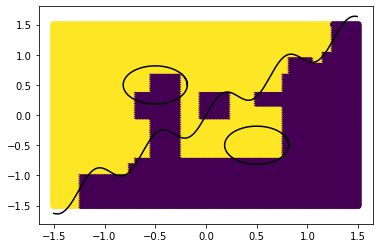

In [76]:
score = clfABC.score(np.array(X_test), y_test)
print('Score ABC: ',score)

cla=clfABC.predict(XY)
plt.scatter(X2, Y2, c = cla)
plotTrueBoundaries(plt.gca())

### •

#### DecisionTreeClassifier

For depths from 1 to 20 the score for the DTC is calculated and saved in *yscore*. For certain depths the predicted results are shown in a plot. At the end the score is plottet against the max_depth together with a horizontal line at the height of the score for the default max_depth (None).

Score DTC for max_depth  1 :  0.6484848484848484


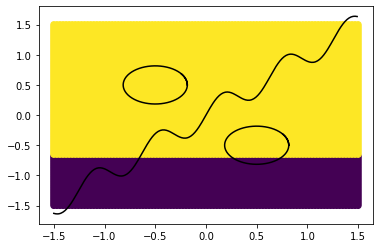

Score DTC for max_depth  3 :  0.8121212121212121


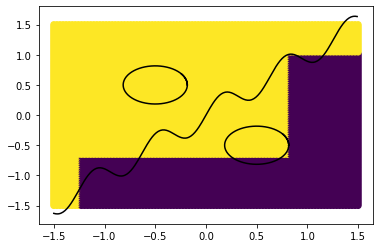

Score DTC for max_depth  5 :  0.8242424242424242


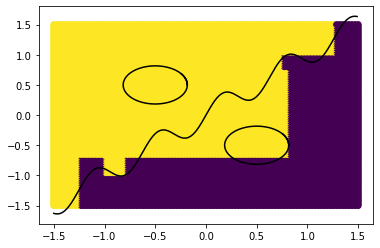

Score DTC for max_depth  10 :  0.9393939393939394


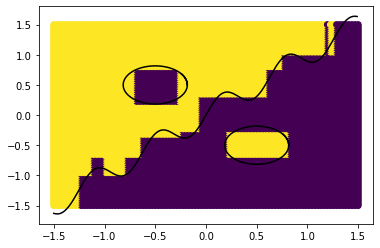

Text(0, 0.5, 'score')

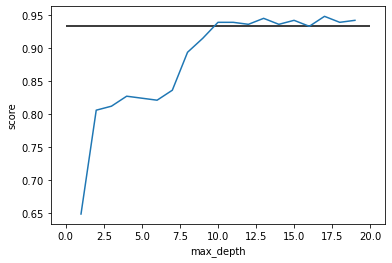

In [80]:
depth=np.arange(1,20,1)
yscore=[]
for i in depth:
    clfDTC = tree.DecisionTreeClassifier(max_depth=i)
    clfDTC.fit(X_train, y_train);
    score = clfDTC.score(np.array(X_test), y_test)
    yscore.append(score)
    if i==1 or i==3 or i==5 or i==10:
        print('Score DTC for max_depth ',i,': ',score)
        cla=clfDTC.predict(XY)
        plt.scatter(X2, Y2, c = cla)
        plotTrueBoundaries(plt.gca())
        plt.show()
plt.plot(depth,yscore)
plt.hlines(scoreDTC,0,20)
plt.xlabel('max_depth')
plt.ylabel('score')

As one can see, the score gets better for higher max_depths. At a max_depth of around 10 the optimal score is already reached and the score tendencially doesn't change for even higher max_depths.